<a href="https://colab.research.google.com/github/mesushan/CNN-for-image-Classification/blob/master/cnn_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 

In [14]:
input_size = (128, 128)
model = tf.keras.models.Sequential([
    tf.keras.layers.Convolution2D(128,(3,3),activation = "relu", input_shape = (input_size[0], input_size[1],3)),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Convolution2D(64,(3,3),activation = "relu" , input_shape = (input_size[0], input_size[1],3)) ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Convolution2D(32,(3,3),activation = "relu" , input_shape = (input_size[0], input_size[1],3)) ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Convolution2D(16,(3,3),activation = "relu" , input_shape = (input_size[0], input_size[1],3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    # tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    # tf.keras.layers.Dropout(0.1,seed = 2019),
    # tf.keras.layers.Dense(400,activation ="relu"),
    # tf.keras.layers.Dropout(0.3,seed = 2019),
    # tf.keras.layers.Dense(300,activation="relu"),
    # tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(128,activation ="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(7,activation = "softmax")   #Adding the Output Layer
])

In [15]:
# Initialising the CNN
# model = tf.keras.models.Sequential()

In [16]:
# 32 feature detectors with 3*3 dimensions so the convolution layer compose of 32 feature maps
# 128 by 128 dimensions with colored image(3 channels)  (tensorflow backend)
# input_size = (128, 128)
# model.add(tf.keras.layers.Convolution2D(32, 3, 3, input_shape = (input_size[0], input_size[1],3), activation = 'relu'))

In [17]:
# reduce the size of feature maps and therefore reduce the number of nodes in the future fully connected layer (reduce time complexity, less compute intense without losing the performace). 2 by 2 deminsion is the recommended option
# model.add(tf.keras.layers.MaxPooling2D(pool_size = (3, 3)))

In [18]:
# model.add(tf.keras.layers.Convolution2D(64, 3, 3, activation = 'relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

In [19]:
# flatten all the feature maps in the pooling layer into single vector
# model.add(tf.keras.layers.Flatten())

In [20]:
# making classic ann which compose of fully connected layers
# number of nodes in hidden layer (output_dim) (common practice is to take the power of 2)
# model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
# # model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(units = 7, activation = 'softmax'))

In [21]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
# image augmentation technique to enrich our dataset(training set) without adding more images so get good performance  results with little or no overfitting even with the small amount of images
# used from keras documentation (flow_from_directory method)

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

batch_size = 50
# image augmentation part
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# create training set
# wanna get higher accuracy -> inccrease target_size
training_set = train_datagen.flow_from_directory('C:\\Users\VA\Documents\workspace\dump_cnn\dataset\\train',
                                                 target_size = input_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

# create test set
# wanna get higher accuracy -> inccrease target_size
test_set = test_datagen.flow_from_directory('C:\\Users\VA\Documents\workspace\dump_cnn\dataset\\test',
                                            target_size = input_size,
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# fit the cnn model to the trainig set and testing it on the test set
history = model.fit(training_set,
          steps_per_epoch = len(training_set),
          epochs = 30,
          validation_data = test_set,
          validation_steps = len(test_set),
          callbacks=[early_stopping])

Found 752 images belonging to 7 classes.
Found 202 images belonging to 7 classes.


Epoch 1/30
16/16 [==============================] - 16s 919ms/step - loss: 1.8187 - accuracy: 0.2593 - val_loss: 1.7471 - val_accuracy: 0.4257
Epoch 2/30
16/16 [==============================] - 14s 895ms/step - loss: 1.6317 - accuracy: 0.3976 - val_loss: 1.6585 - val_accuracy: 0.3267
Epoch 3/30
16/16 [==============================] - 14s 896ms/step - loss: 1.7017 - accuracy: 0.3112 - val_loss: 1.6355 - val_accuracy: 0.4653
Epoch 4/30
16/16 [==============================] - 16s 970ms/step - loss: 1.4764 - accuracy: 0.4468 - val_loss: 1.4015 - val_accuracy: 0.5495
Epoch 5/30
16/16 [==============================] - 16s 979ms/step - loss: 1.3814 - accuracy: 0.4561 - val_loss: 1.3062 - val_accuracy: 0.5050
Epoch 6/30
16/16 [==============================] - 19s 1s/step - loss: 1.2570 - accuracy: 0.5133 - val_loss: 1.2727 - val_accuracy: 0.5891
Epoch 7/30
16/16 [==============================] - 16s 972ms/step - loss: 1.1780 - accuracy: 0.5359 - val_loss: 1.1806 - val_accuracy: 0.5990
Ep

In [23]:
test_generator = test_datagen.flow_from_directory(
    'dataset/test',         # Path to the test data directory
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'
)
model.evaluate(test_set)

Found 202 images belonging to 7 classes.


5/5 [==============================] - 1s 156ms/step - loss: 0.5514 - accuracy: 0.8465


[0.5513574481010437, 0.8465346693992615]

In [24]:
model.evaluate(training_set)

16/16 [==============================] - 4s 267ms/step - loss: 0.4616 - accuracy: 0.8684


[0.46156907081604004, 0.8683510422706604]

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)      

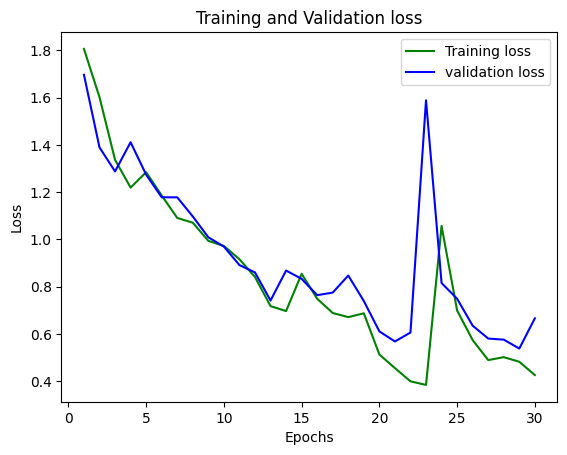

In [6]:
import matplotlib.pyplot as plt

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
# plt.plot(x, y, '-', color='green')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

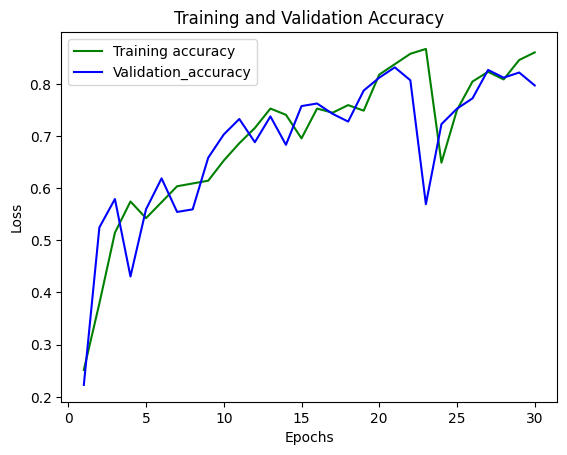

In [7]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation_accuracy')
# plt.plot(x, y, '-', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model.save('cnn_v2.h5') #overfitting issue

In [19]:
import numpy as np
import keras.utils as image
# from keras.preprocessing import image

In [20]:
training_set.class_indices

{'duapuluh': 0,
 'duaribu': 1,
 'limapuluh': 2,
 'limaribu': 3,
 'sepuluh': 4,
 'seratus': 5,
 'seribu': 6}

In [53]:
test_image = image.load_img('C:\\Users\VA\Documents\workspace\dump_cnn\dataset\\predict\\limpulutuh.jpeg', target_size= input_size)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
test_image = test_image/255.0

1/1 [==============================] - 0s 30ms/step


In [54]:
predictions = model.predict(test_image)
np.around(predictions[0],3)

1/1 [==============================] - 0s 33ms/step


array([0.001, 0.   , 0.999, 0.   , 0.   , 0.   , 0.   ], dtype=float32)

In [55]:
class_index = np.argmax(predictions)
class_label = training_set.class_indices
predicted_class = list(class_label.keys())[list(class_label.values()).index(class_index)]
class_index

2

In [56]:
print("Predicted class:", predicted_class)
print("Class probabilities:", np.around(predictions[0],3))                  

Predicted class: limapuluh
Class probabilities: [0.001 0.    0.999 0.    0.    0.    0.   ]


In [ ]:
training_set.class_indices

In [ ]:
result[0][0]

In [ ]:
result

In [ ]:
if result [0][0] == 1:
  prediction = 'duapuluh'
elif result [0][1] == 1:
  prediction = "limapuluh"
else:
  prediction = 'seratus'

In [ ]:
prediction

Accuracy : 0.88